# What Patterns Determine Game Sales

I work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. I will identify patterns that determine whether a game succeeds or not. This will allow me to spot potential big winners and plan advertising campaigns.
I'm usinh data from 2016, I'm planning a campaign for 2017. 

ESRB: The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

## Study Information

In this step, I load 6 libraries. Then I import the file into a dataframe. I study the columns to see what type of data I have, I look at the rows to see how the values look. I make sure I understand all categories and values. I look at the shape of the dataframe, missing values, and datatypes. Now I am ready to prep this data.

In [2]:
#Loading libraries
import pandas as pd
pd.options.mode.chained_assignment = None  
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
import seaborn as sns


In [3]:
#Import data files into dataframes
df_games = pd.read_csv('/datasets/games.csv')

In [5]:
#Study 
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#any missing values
df_games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
#check data types
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


[I notice the size of the dataframe: 16,715 rows and 11 columns.] 

[I notice missing values for: name(2), year_of_release(269), genre(2), critic_score(8578), user_score(6701), rating(6766). The more the missing values in a column, the less accuracte my analysis is. With the name and genre I can delete the rows with missing values by showing a low percentage of missing values, but the others will require more work.]


## Prepare Data 

To prepare the data, I need to make the columns in lowercase. Lower case letters are easier to code, it requires less keys to be pressed. 

Next I filled missing values. For year_of_release, name, and genre: I dropped them because there are not that many missing. For critic_score I filled missing values with 0 , becaues I realize that filling them with anything else will effect my analysis. For rating I filled missing values with 'unknown', because you can't fill the misisng value of the rating of a game with something approximated. For user_score, I first had to change tbd to nan values, then replace with '0'. I use unknown for an object datatype, I use 0 for an int datatype.

After NaN values are replaced, I can change datatypes. I changed year_of_release, critic_score, and user_score. They all need to be int because they are all numbers, but they don't need to have decimals for calculations, and it's better looking to have deimcals gone.

In [6]:
#Replace the column names (make them lowercase)
df_games.columns = [x.lower() for x in df_games.columns]
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Missing Values 

Why do you think the values are missing? Give possible reasons:

I notice misisng values for critic_score, user_score, rating, and year of release. Logically, I would assume the game wasn't released yet. Or the game was released in 2016 (and the data isn't ready to be analyzed). It takes some time after a game is released for users and critics to experience the game before they provide a rating. 

#### Year, Name, Genre

In [7]:
#drop missing values for ['Year_of_Release', 'Name', 'Genre'] only
df_games = df_games.dropna(subset=['year_of_release', 'name', 'genre'])

In [8]:
#check work
df_games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

#### Critic Score 

In [9]:
#how many missing values
print(df_games['critic_score'].isnull().sum())
print(8461/16444 *100)
print("8461 rows, roughly 51.4% of values, are missing")

8461
51.453417659936754
8461 rows, roughly 51.4% of values, are missing


In [10]:
#fill missing values with 0
df_games['critic_score'] = df_games['critic_score'].fillna('0')

In [11]:
#check
df_games.isnull().sum(), df_games.shape

(name                  0
 platform              0
 year_of_release       0
 genre                 0
 na_sales              0
 eu_sales              0
 jp_sales              0
 other_sales           0
 critic_score          0
 user_score         6605
 rating             6676
 dtype: int64,
 (16444, 11))

#### User Score

Before I repeat the process I need to deal with tbd values. This is a string value, and that messes up everything so I will fix it. I converted tbd to nan values and converted the data type so that I'm able to see fill missing values

In [12]:
#how many missing?
print(df_games['user_score'].isnull().sum())
print( 6605/16444 *100)
print("6605 rows, roughly 40.16% of values, are missing")

6605
40.166626125030405
6605 rows, roughly 40.16% of values, are missing


In [13]:
#check data type and unique values
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
#convert tbd to nan and change dtype
df_games['user_score'] = df_games['user_score'].apply(lambda x: float(np.nan) \
                                                      if x=='tbd' else float(x))

In [15]:
#fill missing values with 0
df_games['user_score'] = df_games['user_score'].fillna('0')

#### Rating 

I fill the missing values with unknown value because this value contains information that defines specific standards. It needs to be accurate or left unknown to not skew data

In [16]:
#check data type and unique values
df_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
# df_games.groupby(['platform', 'rating']).count()
#df_games['rating'].fillna(df_games.groupby('name')['platform'].transform('first'), inplace=True)

df_games['rating'] = df_games['rating'].fillna('unknown')

In [18]:
#check work
df_games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Change Data Type

[Describe the columns where the data types have been changed and why:


1. user_score to int: The scale is 1-10, no decimal needed
2. critic_score to int: The scale is 1-100, no demical needed 
3. year_of_release to int: the format for years do not have decimal 

In [19]:
#change data type
df_games['user_score'] = df_games['user_score'].astype(int)

In [20]:
#change data type
df_games['critic_score'] = df_games['critic_score'].astype(int)

In [21]:
#change data type
df_games['year_of_release'] = df_games['year_of_release'].astype(int)

In [22]:
#check columns, values
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0,unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0,unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0,unknown
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0,unknown


## Analyze  

For the analyze portion, I wanna know what factors might affect the revenue. I look at the number of games sold per year. I'm looking for year's that have the most number of games. I determine a time period that is significant, and eliminate data that is not useful. Then I look at the total sales per platform, to see what platforms have the highest revenue. Then I look at average critic and user scores  of each platform to determine if the platform with the highest revenue is correlated with the highest rated platform. Then I look at which genre has the most revenue. 

### Number of Games per Year 

Look at how many games were released in different years. Is the data for every period significant?

Not every period is significant. I am looking for what makes a game profitable, therefore I need to focus on years that make the highest revenue. I can make the asusmption that more games sold in a year will result in that year having a higher total revenue. This means I want to focus on years that have the highest number of games sold. 

Determine what period you should take data for. I will take data after 1995, because it has the most games released. I notice when I drop the years before 1995: it's better to analyze. 

In [23]:
 #remove irrelveant years
df_games = df_games.loc[df_games['year_of_release'] > 1995]

In [24]:
#calculate how many games were released 
cols = ['name','year_of_release']
df_agg = df_games[cols]
df_agg = df_agg.groupby(['year_of_release']).count().reset_index()
df_agg.rename(columns = {"name":"game_count"},inplace=True)
display(df_agg)

,year_of_release,game_count
0,1996,263
1,1997,289
2,1998,379
3,1999,338
4,2000,350
5,2001,482
6,2002,829
7,2003,775
8,2004,762
9,2005,939


<AxesSubplot:title={'center':'Game Count Per Year'}, xlabel='year_of_release', ylabel='game_count'>

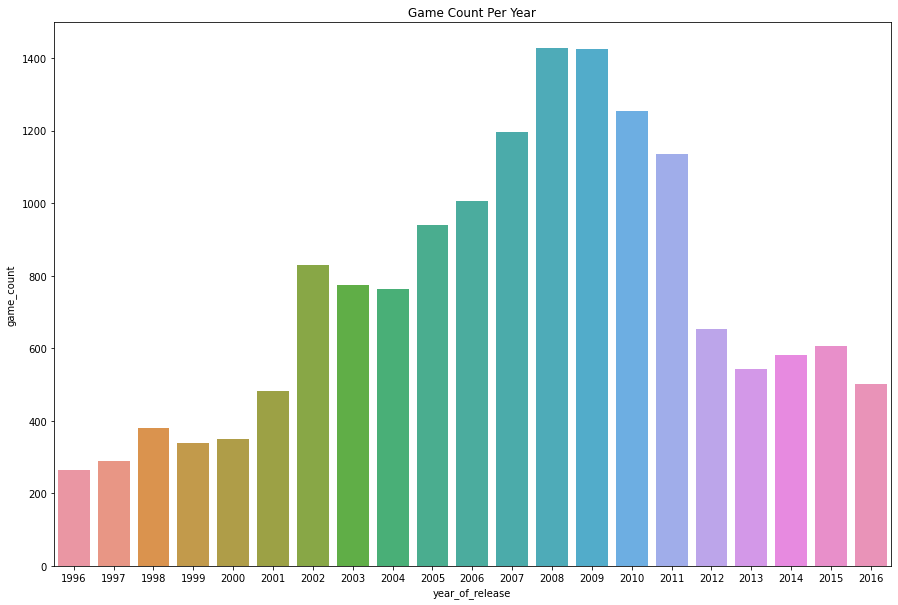

In [25]:
#barplot 
plt.figure(figsize=(15,10))
plt.title('Game Count Per Year')
plt.xlabel("Year")
plt.ylabel("Game Count")
sns.barplot(x='year_of_release',y='game_count',data=df_agg)


### Total Sales per Platform 

In [26]:
#combine all sales to make global 
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['jp_sales']
df_games['total_sales']

0        77.86
2        36.02
3        33.10
4        40.60
6        33.42
         ...  
16710     0.02
16711     0.01
16712     0.02
16713     0.01
16714     0.02
Name: total_sales, Length: 15739, dtype: float64

In [27]:
#break down by platform
#calculate average global sales per platform
cols = ['total_sales', 'platform']
df_agg_1 = df_games[cols]
df_agg_1= df_agg_1.groupby(['platform']).mean().reset_index()
df_agg_1.rename(columns = {"total_sales":"platform_sales"},inplace=True)
display(df_agg_1)

,platform,platform_sales
0,3DS,0.674141
1,DC,0.466154
2,DS,0.433358
3,GB,3.030833
4,GBA,0.433822
5,GC,0.392878
6,N64,0.783101
7,NG,0.100000
8,PC,0.227898
9,PCFX,0.060000


In [28]:
#distribution of sales per platform per year
df_agg_1[['platform', 'platform_sales']].value_counts(normalize=True)

platform  platform_sales
3DS       0.674141          0.041667
DC        0.466154          0.041667
XB        0.304446          0.041667
X360      0.721315          0.041667
WiiU      0.607143          0.041667
Wii       0.685653          0.041667
WS        0.473333          0.041667
SNES      0.860541          0.041667
SAT       0.360196          0.041667
PSV       0.161352          0.041667
PSP       0.272129          0.041667
PS4       0.718750          0.041667
PS3       0.670873          0.041667
PS2       0.555068          0.041667
PS        0.721443          0.041667
PCFX      0.060000          0.041667
PC        0.227898          0.041667
NG        0.100000          0.041667
N64       0.783101          0.041667
GC        0.392878          0.041667
GBA       0.433822          0.041667
GB        3.030833          0.041667
DS        0.433358          0.041667
XOne      0.588623          0.041667
dtype: float64

<AxesSubplot:title={'center':'Total Sales per Platform'}, xlabel='platform', ylabel='platform_sales'>

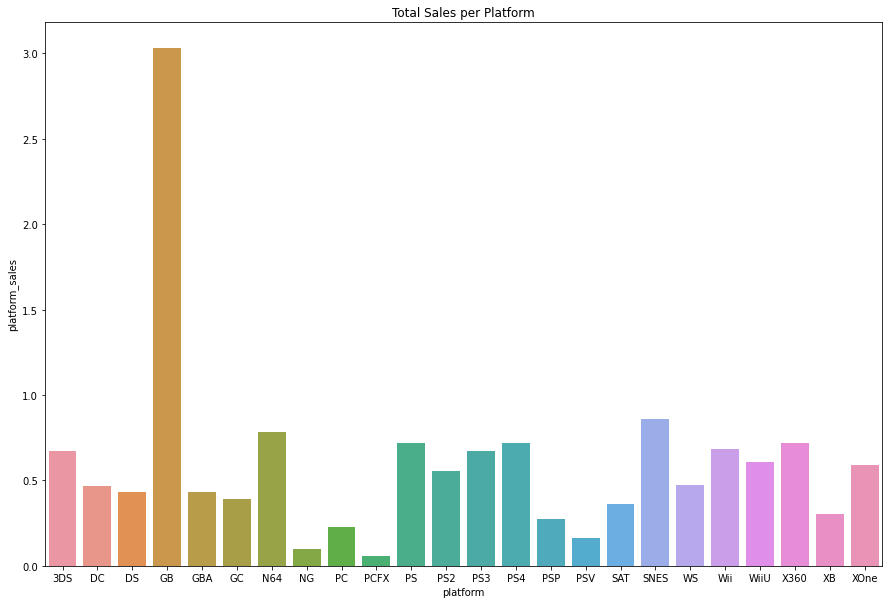

In [29]:
#boxplot total sales per platform per year
plt.figure(figsize=(15,10))
plt.title('Total Sales per Platform')
plt.xlabel("Platform")
plt.ylabel("Sales")
sns.barplot(x='platform',y='platform_sales',data=df_agg_1)

Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

I can see platforms have signifcant difference in total sales (of all games). Platforms with high sales will be displayed in order from right to left, so this graph is easy to read. I see that Wii, GB, and DS all have similar revenue. 

Text(0, 0.5, 'Sales(M)')

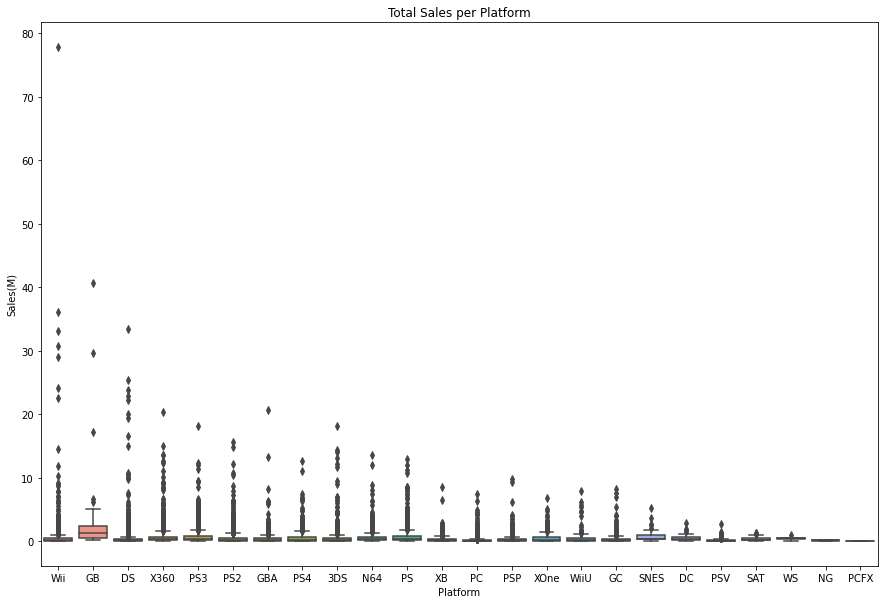

In [30]:
#global sales of all games by platform
plt.figure(figsize=(15,10))
sns.boxplot(x='platform', y='total_sales', data=df_games)
plt.title('Total Sales per Platform')
plt.xlabel("Platform")
plt.ylabel("Sales(M)")

<AxesSubplot:title={'center':'Platform Sales'}, xlabel='year', ylabel='sales'>

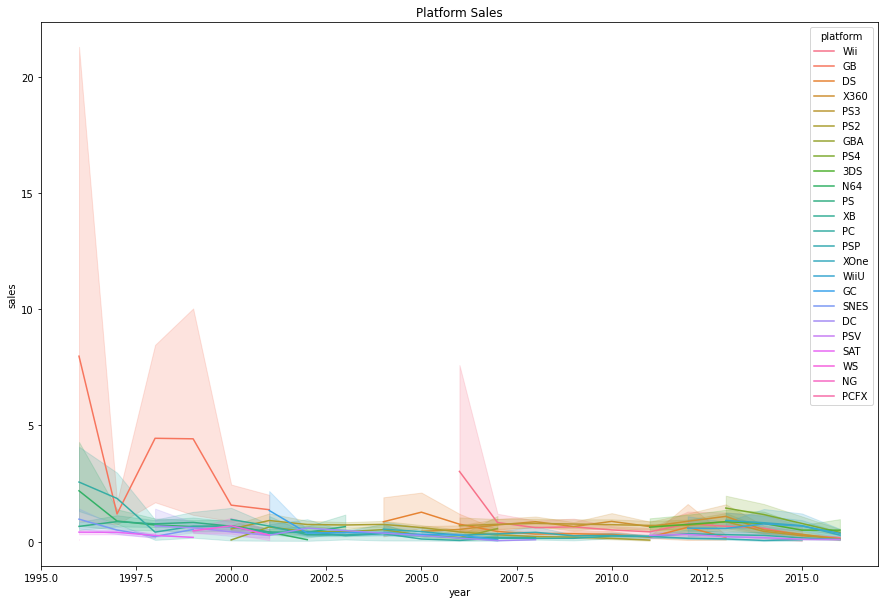

In [31]:
#total sales of platform over all years
plt.figure(figsize=(15,10))
plt.title('Platform Sales')
plt.xlabel("year")
plt.ylabel("sales")
sns.lineplot(hue='platform', x='year_of_release',y='total_sales',data=df_games)

Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

I can see with this lineplot that some platforms don't take long to appear, because of the spikes in sales. I do notice some lines don't make it to 2016. They can fade over a 10-20 year period. 

### Significant/Active Platforms  

<AxesSubplot:xlabel='platform'>

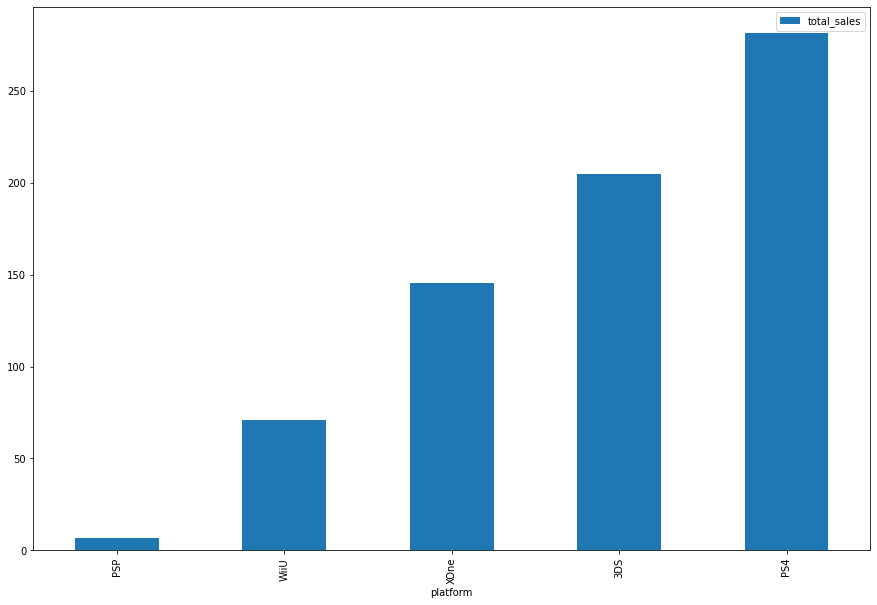

In [32]:
#which relevant platform has the highest sales??
my_query = """
platform == ["PS4", "XOne", "3DS", "PS", "PSP", "WiiU"] & year_of_release >= 2013
"""


df_games.query(my_query)\
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')\
    .sort_values(by='total_sales', ascending=True)\
    .plot(kind='bar', stacked=True, figsize=(15,10), colormap='tab20')

In conclusion:
    
    First step was filering the data. Targeting data for year_of_release (2013_2016) allows me to analyze more accurate data. I also wanted to filter out platforms that not longer exist. I was able to do this in it's own variable, and then use query, pivot table, sort values, and plot. 
    
    The first observation: the platform clearly DOES have an impact on revenue. If the platforms revenues were generally equal, the impact wouldn't be significant. The chart provides a clear visual to help me draw the conlusion: PS4 has the most revenue, PSP has the lowest. 

Create a new dataframe with the relevant years and use it for the rest of your project? Check whether results and conclusions are still the same or whether they should be slightly updated?

In [33]:
#filter relevant years
df_games = df_games.loc[df_games['year_of_release']>=2013]

In [34]:
#filter relevant platforms
platform_list = ["PS4", "XOne", "3DS", "PS", "PSP", "WiiU"]
df_games = df_games[df_games['platform'].isin(platform_list)]

In [35]:
#check dataframe
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0,unknown,12.61
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0,unknown,18.17
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8,M,11.03
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0,unknown,14.04
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4,E,7.36
...,...,...,...,...,...,...,...,...,...,...,...,...
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6,unknown,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,0,0,unknown,0.02
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,0,0,M,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,0,0,unknown,0.02


In [36]:
 print('Only', 1124/16715*100,'% of our original data has relevant years & platforms')

Only 6.724498953036195 % of our original data has relevant years & platforms


### Platform Sales v. Critic_score & User_score

Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

If reviews did affect the sales, I would notice a cluster of values in the right uppper corner, meaning high sales and high ratings. Even with a low score, I see a decent amount of sales. It seems people like the game despite what others review it. I conclude that there is no correlation. 

In [37]:
#merge df_agg_1 into df_games to calculate corr: platform_sales v. reviews
df_agg_2 = pd.merge(df_games, df_agg_1, how='left', on = ['platform'])
print( df_agg_2.shape )

(1124, 13)


In [38]:
#pick one platform: PS4
df_agg_2 = df_agg_2.loc[df_agg_2['platform'] == 'PS4']

In [39]:
#sort the values
df_agg_2[['platform', 'user_score', 'critic_score', 'total_sales']].sort_values('total_sales')

,platform,user_score,critic_score,total_sales
1102,PS4,0,0,0.01
1028,PS4,0,0,0.01
1017,PS4,0,0,0.01
1044,PS4,0,0,0.01
1016,PS4,0,0,0.01
...,...,...,...,...
7,PS4,5,85,6.57
5,PS4,0,0,6.92
4,PS4,4,82,7.36
2,PS4,8,97,11.03


In [40]:
#exclude 0 sales 
df_games_critic_score = df_games.loc[df_games['critic_score'] > 0]

In [41]:
#check data 
df_games_critic_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8,M,11.03
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4,E,7.36
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5,M,6.57
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5,E,6.57
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6,M,6.28
...,...,...,...,...,...,...,...,...,...,...,...,...
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51,5,M,0.01
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65,6,M,0.01
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63,8,E,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81,8,E,0.01


<AxesSubplot:title={'center':'Critic Score Sales Plot'}, xlabel='Critic Score', ylabel='Sales'>

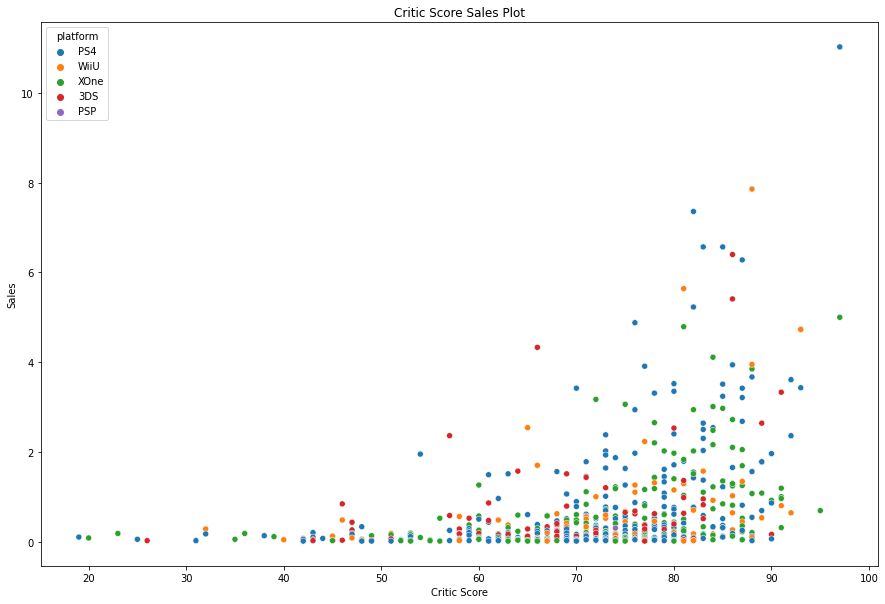

In [42]:
#make scatterplot for critic score
plt.figure(figsize=(15,10))
plt.title('Critic Score Sales Plot')
plt.xlabel("Critic Score")
plt.ylabel("Sales")
sns.scatterplot(x='critic_score', y='total_sales', hue='platform', data=df_games_critic_score)

Above I see the highest revenue is correlated with critic score above 70!! There are dense clusters of games with low revenue, between 70-80. I would consider 80-90 the highest revenue, based on critic score.  

<AxesSubplot:title={'center':'User Score Sales Plot'}, xlabel='User Score', ylabel='Sales'>

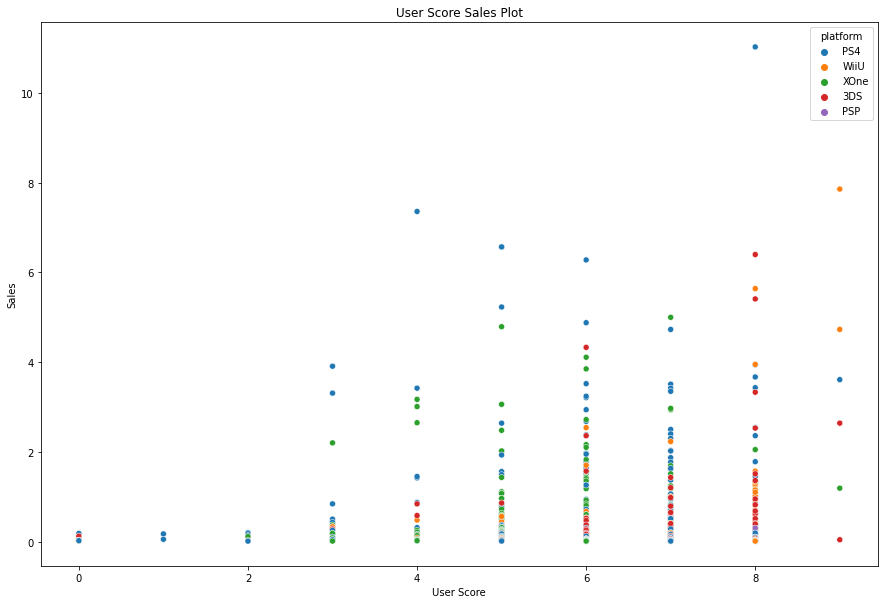

In [43]:
#make scatterplot for user_score
plt.figure(figsize=(15,10))
plt.title('User Score Sales Plot')
plt.xlabel("User Score")
plt.ylabel("Sales")
sns.scatterplot(x='user_score', y='total_sales', hue='platform', data=df_games_critic_score)

Above I observe the following: the user score doesn't have a large impact on revenue. The most common ratings (6, 7, or 8) all have a significant revenue. It seems rare for a rating of 9 is occur, but typically reflects revenue.

In [44]:
#calculate critic/user reviews
cols = ['critic_score', 'user_score', 'platform',  'total_sales']
score_sales = df_games_critic_score[cols]
score_sales= score_sales.groupby(['total_sales', 'platform']).median().reset_index()
# platform_1.rename(columns = {"total_sales":"platform_sales"},inplace=True)
display(score_sales)

,total_sales,platform,critic_score,user_score
0,0.01,3DS,77.0,8.0
1,0.01,PS4,51.0,6.0
2,0.01,WiiU,74.0,7.5
3,0.01,XOne,65.0,6.0
4,0.02,3DS,34.5,1.0
...,...,...,...,...
352,6.57,PS4,83.0,5.0
353,6.57,PS4,85.0,5.0
354,7.36,PS4,82.0,4.0
355,7.86,WiiU,88.0,9.0


Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [45]:
#distribution of games by genre
df_games[['name', 'genre']].value_counts(normalize=True)

name                       genre    
Terraria                   Action       0.003559
Skylanders: SuperChargers  Action       0.003559
FIFA 14                    Sports       0.003559
Angry Birds Star Wars      Strategy     0.003559
LEGO The Hobbit            Action       0.003559
                                          ...   
Infamous: First Light      Action       0.000890
Isshoni Gohan. Portable    Adventure    0.000890
J Legend Retsuden          Misc         0.000890
J Stars Victory Vs.        Fighting     0.000890
inFAMOUS: Second Son       Action       0.000890
Length: 824, dtype: float64

### Global sales per game per platform

In [46]:
#box plot for the global sales of all games, broken down by platform
cols = ['name', 'platform', 'total_sales']
sales_game_plat = df_games[cols]
sales_game_plat= sales_game_plat.groupby(['platform', 'name'])['total_sales'].sum().reset_index()
# platform_1.rename(columns = {"total_sales":"platform_sales"},inplace=True)
display(sales_game_plat)

,platform,name,total_sales
0,3DS,Beyblade Burst,0.06
1,3DS,Fire Emblem Fates,2.08
2,3DS,Frozen: Olaf's Quest,0.54
3,3DS,Haikyu!! Cross Team Match!,0.08
4,3DS,12-Sai. Honto no Kimochi,0.14
...,...,...,...
1119,XOne,XCOM 2,0.04
1120,XOne,ZombiU,0.01
1121,XOne,Zombie Army Trilogy,0.10
1122,XOne,Zoo Tycoon (2013),0.33


<AxesSubplot:title={'center':'Global Sales per Platform'}, xlabel='platform', ylabel='total_sales'>

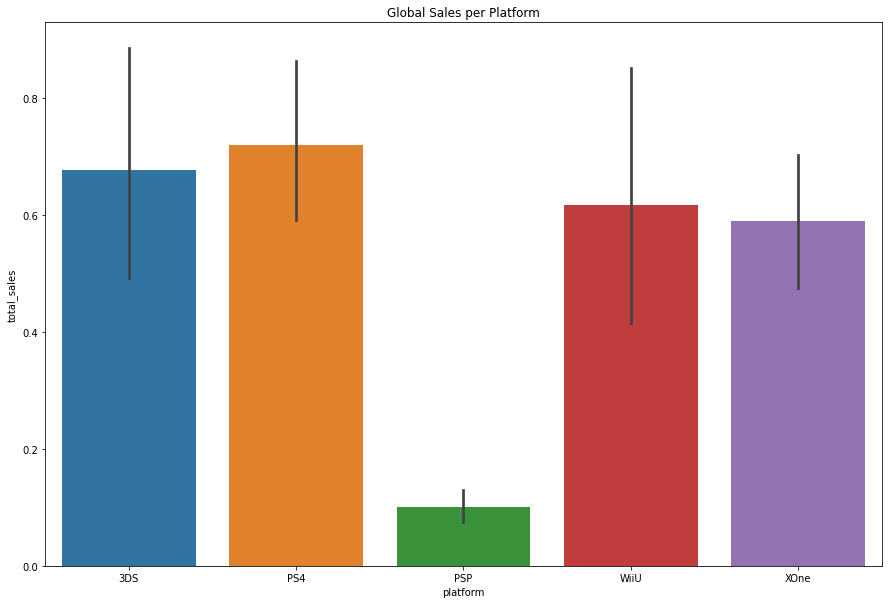

In [47]:
##box plot for the global sales of all games
plt.figure(figsize=(15,10))
plt.title('Global Sales per Platform')
plt.xlabel("Platform")
plt.ylabel("Sales")
sns.barplot(x='platform',y='total_sales',data=sales_game_plat)

Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

The average sales on various platforms are significantly different. It's clear some platforms make higher profit than others on a large scale. These are the platforms to target when your goal is high revenue.

In [48]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0,unknown,12.61
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0,unknown,18.17
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8,M,11.03
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0,unknown,14.04
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4,E,7.36
...,...,...,...,...,...,...,...,...,...,...,...,...
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6,unknown,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,0,0,unknown,0.02
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,0,0,M,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,0,0,unknown,0.02


### Sales per genre 

Now I need to know which genre of games I should target for high revenue. I notice Action, Sports, Role-playing, shooter are veyr popular. I will target these games. Is this genre profitable in all regions? Next I need to break it down by region.

In [49]:
#calculate sales of genre
cols = ['total_sales', 'genre']
df_agg_3 = df_games[cols]
df_agg_3= df_agg_3.groupby(['genre']).sum().reset_index()
df_agg_3.rename(columns = {"total_sales":"genre_sales"},inplace=True)
display(df_agg_3.sort_values(by=['genre_sales']))

,genre,genre_sales
5,Puzzle,4.00
11,Strategy,4.48
1,Adventure,15.07
9,Simulation,15.25
2,Fighting,27.56
6,Racing,27.73
3,Misc,34.05
4,Platform,35.36
10,Sports,78.63
8,Shooter,139.16


## Create 

In Create: I made profiles for the different region sales. I determine the top 5 platform's sales for each region. I'm looking to see what platforms we should target these countries with, so I can make the most revenue based on that info. I make a graph to see the top 5 platform's visually. I repeat the process for genre and ESRB, to determine which reflect the highest revenue. 

For each region (NA, EU, JP), determine:
1. The top five platforms. Describe variations in their market shares from region to region.
2. The top five genres. Explain the difference.
3. Do ESRB ratings affect sales in individual regions?

### NA user profile

#### Platform 

In [50]:
#calculate top 5 platforms
#groupby na_sales by platform
cols = ['na_sales', 'platform']
df_na = df_games[cols]
df_na= df_na.groupby(['platform']).mean().reset_index()
df_na.rename(columns = {"na_sales":"na_agg_sales"},inplace=True)
display(df_na)

,platform,na_agg_sales
0,3DS,0.126073
1,PS4,0.277398
2,PSP,0.000000
3,WiiU,0.254000
4,XOne,0.377004


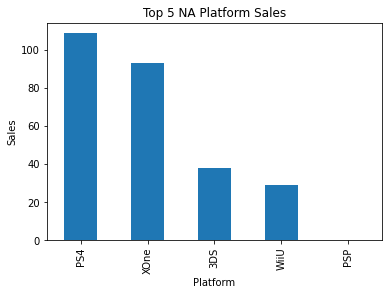

In [51]:
#sort values
#then plot a graph with it
df_games.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top 5 NA Platform Sales')
plt.ylabel("Sales")
plt.xlabel("Platform")
plt.show()

#### Genre 

In [52]:
#calculate top 5 genres
cols = ['na_sales', 'genre']
df_na_genre = df_games[cols]
df_na_genre= df_na_genre.groupby(['genre']).mean().reset_index()
df_na_genre.rename(columns = {"na_sales":"na_agg_sales"},inplace=True)
display(df_na_genre)


,genre,na_agg_sales
0,Action,0.173259
1,Adventure,0.037619
2,Fighting,0.319730
3,Misc,0.121443
4,Platform,0.298085
5,Puzzle,0.059286
6,Racing,0.250000
7,Role-Playing,0.248849
8,Shooter,0.813636
9,Simulation,0.091923


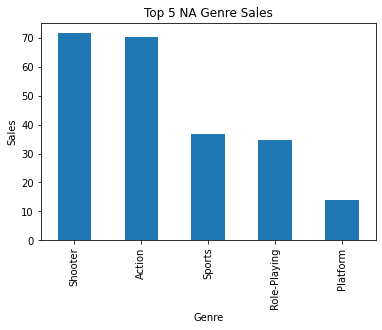

In [53]:
#sort values
#then plot a graph with it
df_games.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top 5 NA Genre Sales')
plt.ylabel("Sales")
plt.xlabel("Genre")
plt.show()

#### ESRB

In [54]:
#find the sales based on ESRB rating
cols = ['na_sales', 'rating']
df_na = df_games[cols]
df_na= df_na.groupby(['rating']).mean().reset_index()
df_na.rename(columns = {"na_sales":"na_agg_sales"},inplace=True)
display(df_na)

,rating,na_agg_sales
0,E,0.307738
1,E10+,0.211020
2,M,0.549693
3,T,0.196452
4,unknown,0.135438


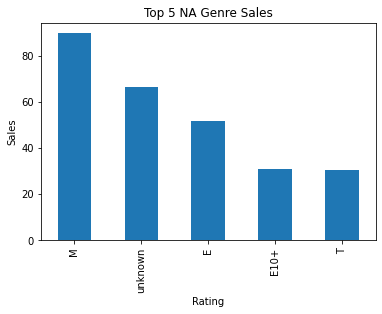

In [55]:
#sort values
#then plot a graph with it
df_games.groupby(['rating'])['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top 5 NA Genre Sales')
plt.ylabel("Sales")
plt.xlabel("Rating")
plt.show()

### EU user profile 

#### Platform 

In [56]:
#calculate top 5 platforms
cols = ['eu_sales', 'platform']
df_eu = df_games[cols]
df_eu= df_eu.groupby(['platform']).mean().reset_index()
df_eu.rename(columns = {"eu_sales":"eu_agg_sales"},inplace=True)
display(df_eu)

,platform,eu_agg_sales
0,3DS,0.102178
1,PS4,0.359923
2,PSP,0.002537
3,WiiU,0.172609
4,XOne,0.208866


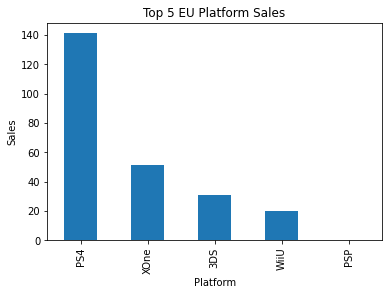

In [57]:
#sort values
#then plot a graph with it
df_games.groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top 5 EU Platform Sales')
plt.ylabel("Sales")
plt.xlabel("Platform")
plt.show()

#### Genre 

In [58]:
#calculate top 5 genres
#calculate top 5 genres
cols = ['eu_sales', 'genre']
df_eu_genre = df_games[cols]
df_eu_genre= df_eu_genre.groupby(['genre']).mean().reset_index()
df_eu_genre.rename(columns = {"eu_sales":"eu_agg_sales"},inplace=True)
display(df_eu_genre)

,genre,eu_agg_sales
0,Action,0.166667
1,Adventure,0.046095
2,Fighting,0.171081
3,Misc,0.097629
4,Platform,0.253830
5,Puzzle,0.070714
6,Racing,0.348780
7,Role-Playing,0.202878
8,Shooter,0.665227
9,Simulation,0.167692


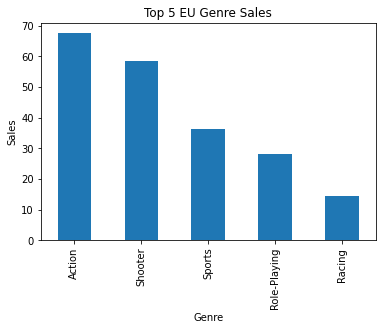

In [59]:
#sort values
#then plot a graph with it
df_games.groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top 5 EU Genre Sales')
plt.ylabel("Sales")
plt.xlabel("Genre")
plt.show()

#### ESRB 

In [60]:
#find the sales based on ESRB rating
cols = ['eu_sales', 'rating']
df_eu = df_games[cols]
df_eu= df_eu.groupby(['rating']).mean().reset_index()
df_eu.rename(columns = {"eu_sales":"eu_agg_sales"},inplace=True)
display(df_eu)

,rating,eu_agg_sales
0,E,0.320536
1,E10+,0.156871
2,M,0.509264
3,T,0.165871
4,unknown,0.118187


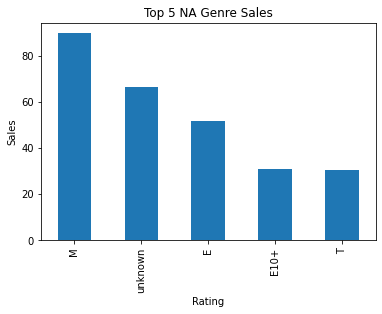

In [61]:
#sort values
#then plot a graph with it
df_games.groupby(['rating'])['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top 5 NA Genre Sales')
plt.ylabel("Sales")
plt.xlabel("Rating")
plt.show()

### JP user profile 

#### Platform 

In [62]:
#calculate top 5 platforms
#calculate top 5 platforms
cols = ['jp_sales', 'platform']
df_jp = df_games[cols]
df_jp= df_jp.groupby(['platform']).mean().reset_index()
df_jp.rename(columns = {"jp_sales":"jp_agg_sales"},inplace=True)
display(df_jp)

,platform,jp_agg_sales
0,3DS,0.223795
1,PS4,0.040714
2,PSP,0.049104
3,WiiU,0.094609
4,XOne,0.001377


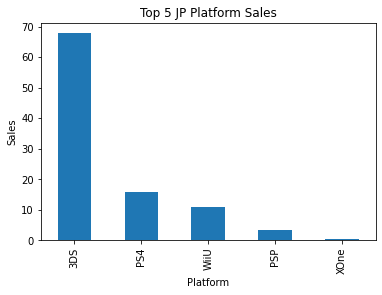

In [63]:
#sort values
#then plot a graph with it
df_games.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top 5 JP Platform Sales')
plt.ylabel("Sales")
plt.xlabel("Platform")
plt.show()

#### Genre 

In [64]:
#calculate top 5 genres
cols = ['jp_sales', 'genre']
df_jp_genre = df_games[cols]
df_jp_genre= df_jp_genre.groupby(['genre']).mean().reset_index()
df_jp_genre.rename(columns = {"jp_sales":"jp_agg_sales"},inplace=True)
display(df_jp_genre)

,genre,jp_agg_sales
0,Action,0.061333
1,Adventure,0.029905
2,Fighting,0.127027
3,Misc,0.065979
4,Platform,0.100213
5,Puzzle,0.077857
6,Racing,0.038780
7,Role-Playing,0.280791
8,Shooter,0.051250
9,Simulation,0.163462


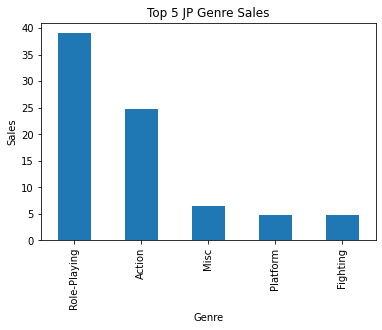

In [65]:
#sort values
#then plot a graph with it
df_games.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top 5 JP Genre Sales')
plt.ylabel("Sales")
plt.xlabel("Genre")
plt.show()

#### ESRB 

In [66]:
#find the sales based on ESRB rating
#find the sales based on ESRB rating
cols = ['jp_sales', 'rating']
df_jp = df_games[cols]
df_jp= df_jp.groupby(['rating']).mean().reset_index()
df_jp.rename(columns = {"jp_sales":"jp_agg_sales"},inplace=True)
display(df_jp)

,rating,jp_agg_sales
0,E,0.079405
1,E10+,0.036599
2,M,0.041411
3,T,0.055419
4,unknown,0.130794


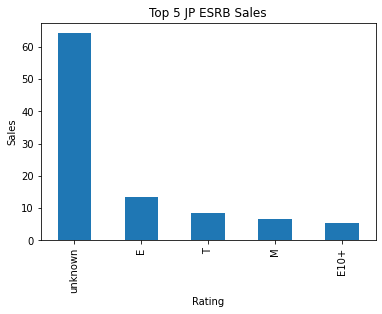

In [67]:
#sort values
#then plot a graph with it
df_games.groupby(['rating'])['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top 5 JP ESRB Sales')
plt.ylabel("Sales")
plt.xlabel("Rating")
plt.show()

## Test Hypothesis

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the alpha threshold value for 0.05

Explain:
—How you formulated the null and alternative hypotheses
—What significance level you chose to test the hypotheses, and why

In [68]:
#Test: user ratings for XboxOne and PC are same
#Null: User ratings for XboxOne and PC, on average, are the nearly the same
#Alt: User ratings for XboxOne and PC, on average, are not close in value


sample_1 = df_games[df_games['platform'] == 'XOne']['user_score']
sample_2 = df_games[df_games['platform'] == 'PC']['user_score']

alpha = 0.05

results = st.ttest_ind(sample_1, sample_2,nan_policy='omit')

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis') 

p-value:  nan
We cannot reject the null hypothesis


In [69]:
#Test: the total_sales for Action and Sports are different (significantly)
#Null: the total_sales for Action and Sports are significantly different
#Alt: the total_sales for Action and Sports are nearly the same
sample1 = df_games[df_games['genre'] == 'Action']['total_sales']

sample2 = df_games[df_games['genre'] == 'Sports']['total_sales']

alpha = 0.05

results = st.ttest_ind(sample1, sample2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis') 

p-value:  0.0068516666864034325
We reject the null hypothesis


In [70]:
#check for missing values
df_games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [71]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0,unknown,12.61
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0,unknown,18.17
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8,M,11.03
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0,unknown,14.04
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4,E,7.36
...,...,...,...,...,...,...,...,...,...,...,...,...
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6,unknown,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,0,0,unknown,0.02
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,0,0,M,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,0,0,unknown,0.02


In [74]:
#view numerical values
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1124 entries, 31 to 16682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1124 non-null   object 
 1   platform         1124 non-null   object 
 2   year_of_release  1124 non-null   int64  
 3   genre            1124 non-null   object 
 4   na_sales         1124 non-null   float64
 5   eu_sales         1124 non-null   float64
 6   jp_sales         1124 non-null   float64
 7   other_sales      1124 non-null   float64
 8   critic_score     1124 non-null   int64  
 9   user_score       1124 non-null   int64  
 10  rating           1124 non-null   object 
 11  total_sales      1124 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 114.2+ KB


##  Conclusion

[For Studying Information: I load 6 libraries, which are all used in the project. I import the file into a dataframe, df_games. I study the columns to see what type of data I have, I look at the rows to see how the values look. I make sure I understand all categories and values. I look at the shape of the dataframe, missing values, and datatypes. Now I am ready to prep this data.]

[For Prepare Data: I filled missing values. For year_of_release, name, and genre: I dropped them because there are not that many missing. For critic_score I filled missing values with 0 , becaues I realize that filling them with anything else will effect my analysis. For rating I filled missing values with 'unknown', because you can't fill the misisng value of the rating of a game with something approximated. For user_score, I first had to change tbd to nan values, then replace with '0'. After NaN values are replaced, I can change datatypes. I changed year_of_release, critic_score, and user_score. They all need to be int because they are all numbers, but they don't need to have decimals for calculations, and it's better looking to have deimcals gone.]

[For Analyze: I want to find the factors that impact revenue. I look at the number of games sold per year, concluding the number of games sold per year is much higher now. I determine a time period and platform that are significant, and eliminate data that is not useful. With a new dataframe, I look at the total sales per platform, to see which have the highest revenue. Then I look at average critic and user scores  of each platform and come to the conclusion that it doesn't have a significant impact on revenue. Then I look at which genre has the most revenue. I concluded that platform and genre have the most impact on sales. ]

[For Create: In order to create a marketing stratetgy, I made profiles for different regions. For each region, I create a bar chart for platform, genre, and ESRB. I am able to visually see what contributes to a high revenue. It's not the same for each region, therefore the marketing strategy will be unique to that region.  

## Report

I would report the following conclusions to the marketing team for Ice online gaming store:

Number of games sold: I noticed the number of games sold in a given year does not have an effect on revenue, meaning the number of games sold won't increase the revenue necessarily. When considereing revenue, you will spend less money if you create less games. 

Critic and User Score: While some companies will pay influncers to reviews their games - I would not reccomend this. I found user score and critic score have little impact on sales. I noticed clusters of low revenue, even in scores greater than or equal to 7. Users typically purchase a game they are already familar with, it doesn't seem  a higher rating will motivate the consumer to purchase the game.

Platform: Creating games for multiple platforms costs money. To increase profit margin, I will suggest the company focus on PS4 for the EU and NA region, and 3DS for the JP region.

Genre: I was able to visually determine genre impacts revenue significantly. In this case, EU and NA are very similar regions: I would suggest making a shooter action game combined, for the PS4 platform. For the JP region, consumers prefer the 3DS platform and Role Play genre: however if they want to combine that with another popular genre, I would suggest Action. 

ESRB: The rating of games allows us to assume the age/maturity level of the consumer. The EU and NA region have similar profiles in this as well, so I will suggest creating a game with a ESRB rating of M for mature. The revenue will be higher if we target a more mature audience. In the JP region, the profile suggests targeting a younger consumer. Majority of ratings were unknown for JP region, however I also noticed E for everyone, T for Teen, M for Mature, and E10+ for everyone older than 10. I would target the ages 10-21 for these games. 

## My original report

Comparing my orginal analysis (below) to my report (above), I learned why it's so important to be mindful when filtering data. Having up-to-date data is far more valuable when predicting future revenue. My reports are completely different based on relevant data in year_of_release and platform.  



NA:
    platform:GB, X360, N64
    genre: Shooter, Platform, Sports
    ESRB: E, unknown, T
EU: 
    platform: PS2, PS3, X360
    genre: Action, Sports, Shooter
    ESRB: E, unknown, T
JP:
    platform: DS, PS2, PS
    genre: Role-Playing, Action, Sports
    ESRB: unknown, E, T]

e = everyone T=teen

Above I can see the most popular genre, platform, and rating. I use this to deliver a marketing strategy to Ice: Different regions have different popular platforms and genres. 

It's useful to see that all three regions have common ESRB ratings, my strategy will be to make advertisements target games that are used by everyone, or people who are teens.   

For all regions, I will use the platform that is most used, and promote their second or third most popular genre and try to increase sales.

1. In NA I will promote platform and sports games on GB
2. In EU I will promote sports and shooter games on PS2
3. In JP I will promote action and sports games on DS

4. However, if this team wants to promote one game, it should be sports (most common amoung all regions), and it should be made for the most popular platforms(GB, PS2, DS)
